# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [181]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from sqlalchemy import create_engine
sns.set()

## Challenge 1

#### The data we will use in this challenge is:

In [7]:
x = np.arange(0,100)
y = x*2
z = x**2


#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

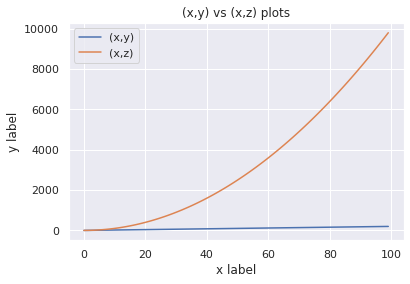

In [19]:
# Method 1 Plotting in the same graph. 

plt.plot(x,y, label='(x,y)')
plt.plot(x,z, label='(x,z)')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title('(x,y) vs (x,z) plots')
plt.legend()
plt.grid(b= True, which='major')
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

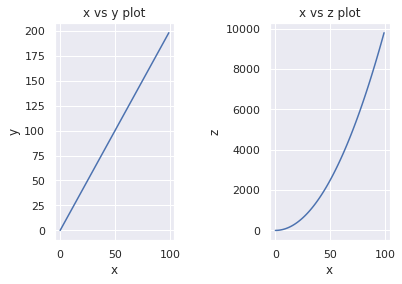

In [94]:
# Method 2 Using sub-plots

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2) # we will place the graphs in the 
                                                 # same figure, but with 2 different subplots (1 row, 2 columns)
ax1.plot(x,y)
ax1.set_title('x vs y plot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(x,z)
ax2.set_title('x vs z plot')
ax2.set_xlabel('x')
ax2.set_ylabel('z')


plt.subplots_adjust(wspace=0.8) #we adjust the space between the two subplots, since the ylabels are overlapped.
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

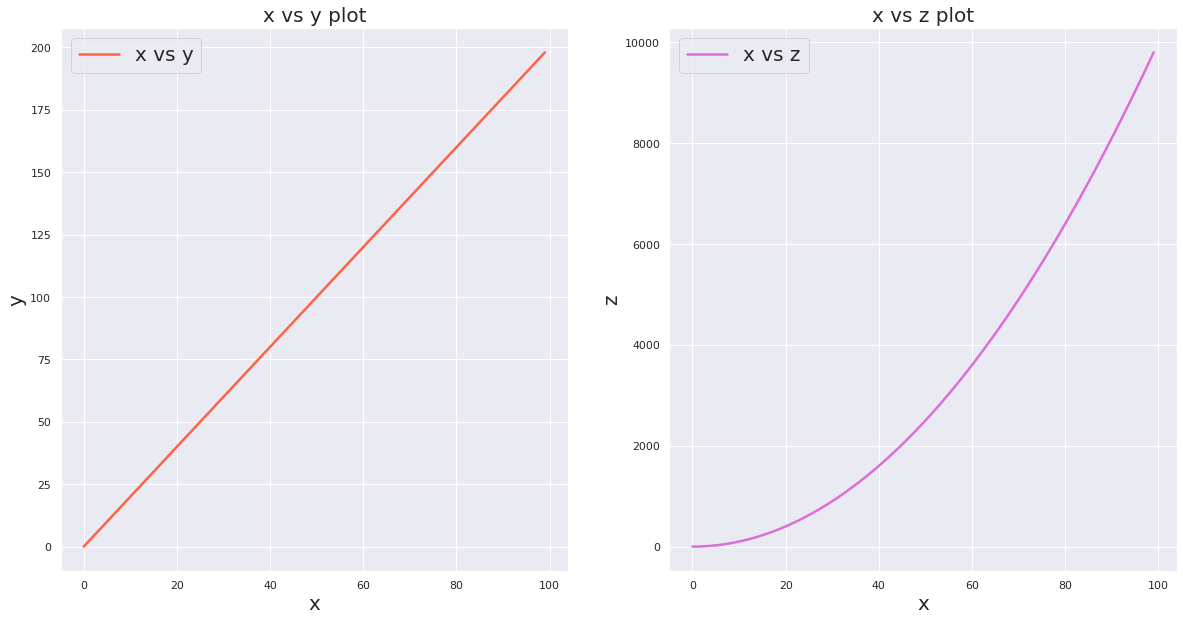

In [80]:
"""font = {'family' : 'Tahoma',
        'weight' : 'normal',
        'size'   : 2}

matplotlib.rc('font', **font)
"""

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(20,10)) #we 
ax1.plot(x,y, label='x vs y', color='tomato', linewidth = 2.5)
ax1.set_title('x vs y plot', fontsize=20)
ax1.set_xlabel('x', fontsize=20)
ax1.set_ylabel('y', fontsize=20)
ax1.legend(fontsize=20)


ax2.plot(x,z, label='x vs z', color='orchid',  linewidth = 2.5)
ax2.set_title('x vs z plot', fontsize=20)
ax2.set_xlabel('x', fontsize=20)
ax2.set_ylabel('z', fontsize=20)
ax2.legend(fontsize=20)

plt.subplots_adjust(wspace=0.2)
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

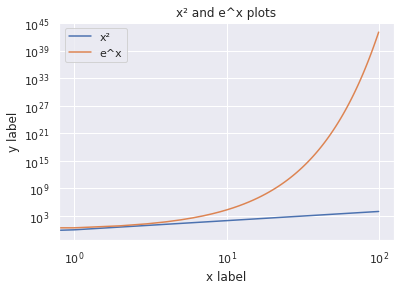

In [92]:
# your code here
x = np.arange(0,100)
y1 = x**2
y2 = np.exp(x)


plt.plot(x,y1, label='x²')
plt.plot(x,y2, label='e^x')

plt.xlabel('x label')
plt.ylabel('y label')

plt.xscale('log')
plt.yscale('log')
plt.title('x² and e^x plots')
plt.legend()
plt.grid(b= True, which='major')
plt.show()


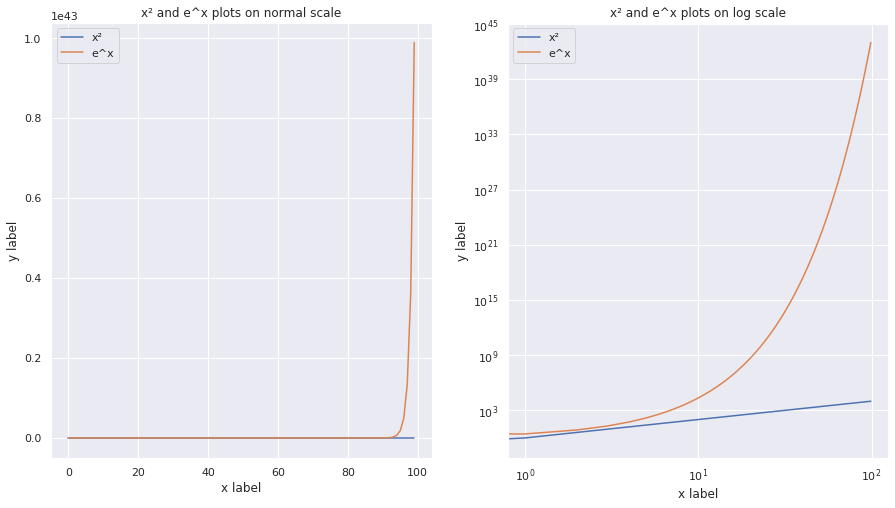

In [100]:
# your code here
x = np.arange(0,100)
y1 = x**2
y2 = np.exp(x)

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(15,8)) 

ax1.plot(x,y1, label='x²')
ax1.plot(x,y2, label='e^x')

ax1.set_xlabel('x label')
ax1.set_ylabel('y label')
ax1.set_title('x² and e^x plots on normal scale')
ax1.legend()



ax2.plot(x,y1, label='x²')
ax2.plot(x,y2, label='e^x')

ax2.set_xlabel('x label')
ax2.set_ylabel('y label')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title('x² and e^x plots on log scale')
ax2.legend()

plt.grid(b= True, which='major')
plt.show()


#### As a bonus challenge, try to add a legend to the plot.

In [101]:
# done in the cell above

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [106]:
driver = "mysql+pymysql"
user = "ironhacker_read"
password = "ir0nhack3r"
ip = "35.239.232.23"
database = "fitbit"

connection_string = f"{driver}://{user}:{password}@{ip}/{database}"

engine = create_engine(connection_string)

In [ ]:
query = """
        SELECT * FROM fitbit.fitbit2
"""

pokemon_raw = pd.read_sql(query, engine)
pokemon_raw.to_csv("../fitbit2.csv", sep = ",")

In [110]:
fitbit2 = pd.read_csv('Fitbit2.csv')

In [111]:
fitbit2.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [141]:
work_weekend

,Steps
Work_or_Weekend,
0,10064.238095
1,10144.572519


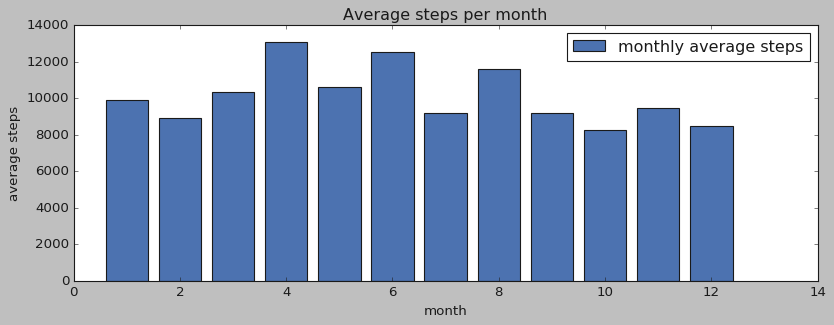

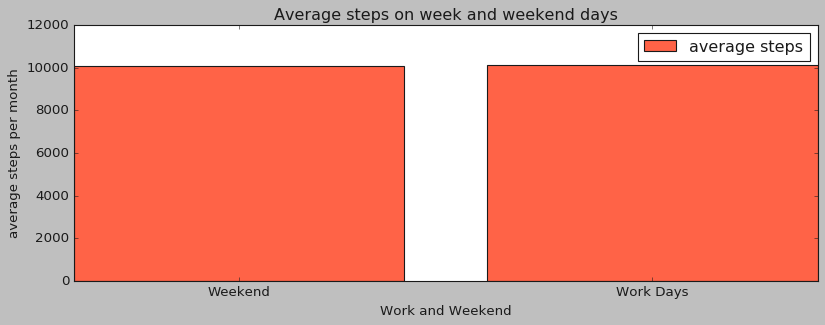

In [194]:
## We prefer to do a graph that is a bar chart since we have data that is discrete and is better not to be 
## represented in a continuous graph. 

# MEDIAN STEPS BY MONTH_ENCODED
avg_steps = fitbit2.groupby(by= 'Months_encoded').mean()[['Steps']]
avg_steps.index

plt.figure(figsize=(12,4))
plt.bar(avg_steps.index, avg_steps['Steps'], label='monthly average steps')

plt.xlabel('month')
plt.ylabel('average steps')

plt.title('Average steps per month')
plt.legend()
plt.savefig('figures/avg_steps_month.png', dpi=300)
plt.show()




# MEDIAN STEPS BY WORK_OR_WEEKEND
work_weekend = fitbit2.groupby(by='Work_or_Weekend').mean()[['Steps']]
plt.figure(figsize=(12,4))
plt.bar(work_weekend.index, work_weekend['Steps'], label='average steps', color='tomato')

plt.xlabel('Work and Weekend')
plt.ylabel('average steps per month')

plt.title('Average steps on week and weekend days')
bins=['Weekend','Work Days']
plt.xticks(work_weekend.index, bins)
plt.legend()
plt.savefig('figures/avg_steps_week_weekend.png', dpi=300)
plt.show()



#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

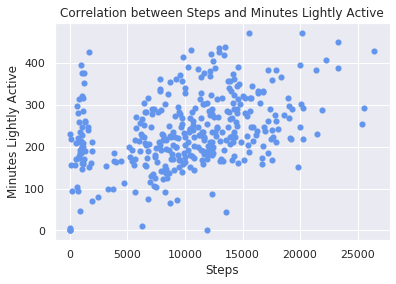

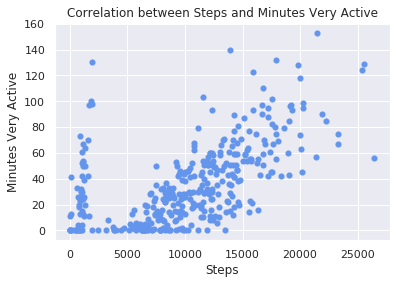

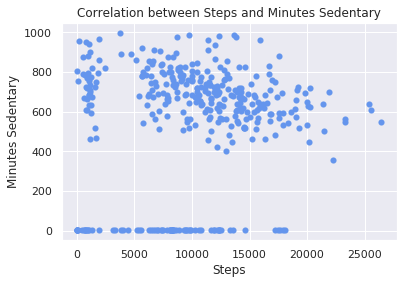

In [165]:
labels_y = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

for y in labels_y: 
    plt.scatter(fitbit2['Steps'], fitbit2[y], linewidth=0.1, color='cornflowerblue')
    plt.title(f"Correlation between Steps and {y}")
    plt.xlabel('Steps')
    plt.ylabel(f"{y}")
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [171]:
titanic = pd.read_csv('titanic.csv', index_col=0)

#### Explore the titanic dataset using Pandas dtypes.

In [172]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [177]:
# NUMERICAL VARIABLES

# one way to do that 
#titanic.select_dtypes(include=np.number).head()

#second way to do the same
num_columns = titanic._get_numeric_data().columns

num_columns


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

the numerical variables are:
- PassengerId
- Survived
- Pclass
- Age
- SibSp
- Parch
- Fare

In [179]:
# CATEGORICAL VARIABLES
set(titanic.columns) - set(num_columns)

{'Cabin', 'Embarked', 'Gender', 'Name', 'Ticket'}

Our categorical variables are: 
- Cabin 
- Embarked
- Gender
- Name
- Ticket

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [277]:
# your code here

mpl.style.use('classic')
mpl.figure.Figure(figsize=(12,6), dpi=300)
sns.set_style('whitegrid')

#### Use the right visulalization to show the distribution of column `Age`.

In [215]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,U0,S


As we can see here the category Age is a float and it should be an integer. We change the data type. 

In [192]:
titanic['Age']=titanic['Age'].astype('int64')

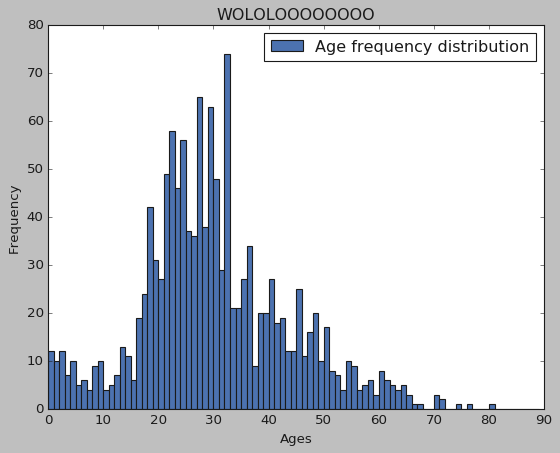

In [200]:
#we can use histogram to plot the distribution of column Age 
bins = [i for i in range(0,90,1)]

plt.hist(titanic['Age'], label='Age frequency distribution', bins=bins)

plt.xlabel('Ages')
plt.ylabel('Frequency')

plt.title('WOLOLOOOOOOOO')
plt.legend()
plt.show()



#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

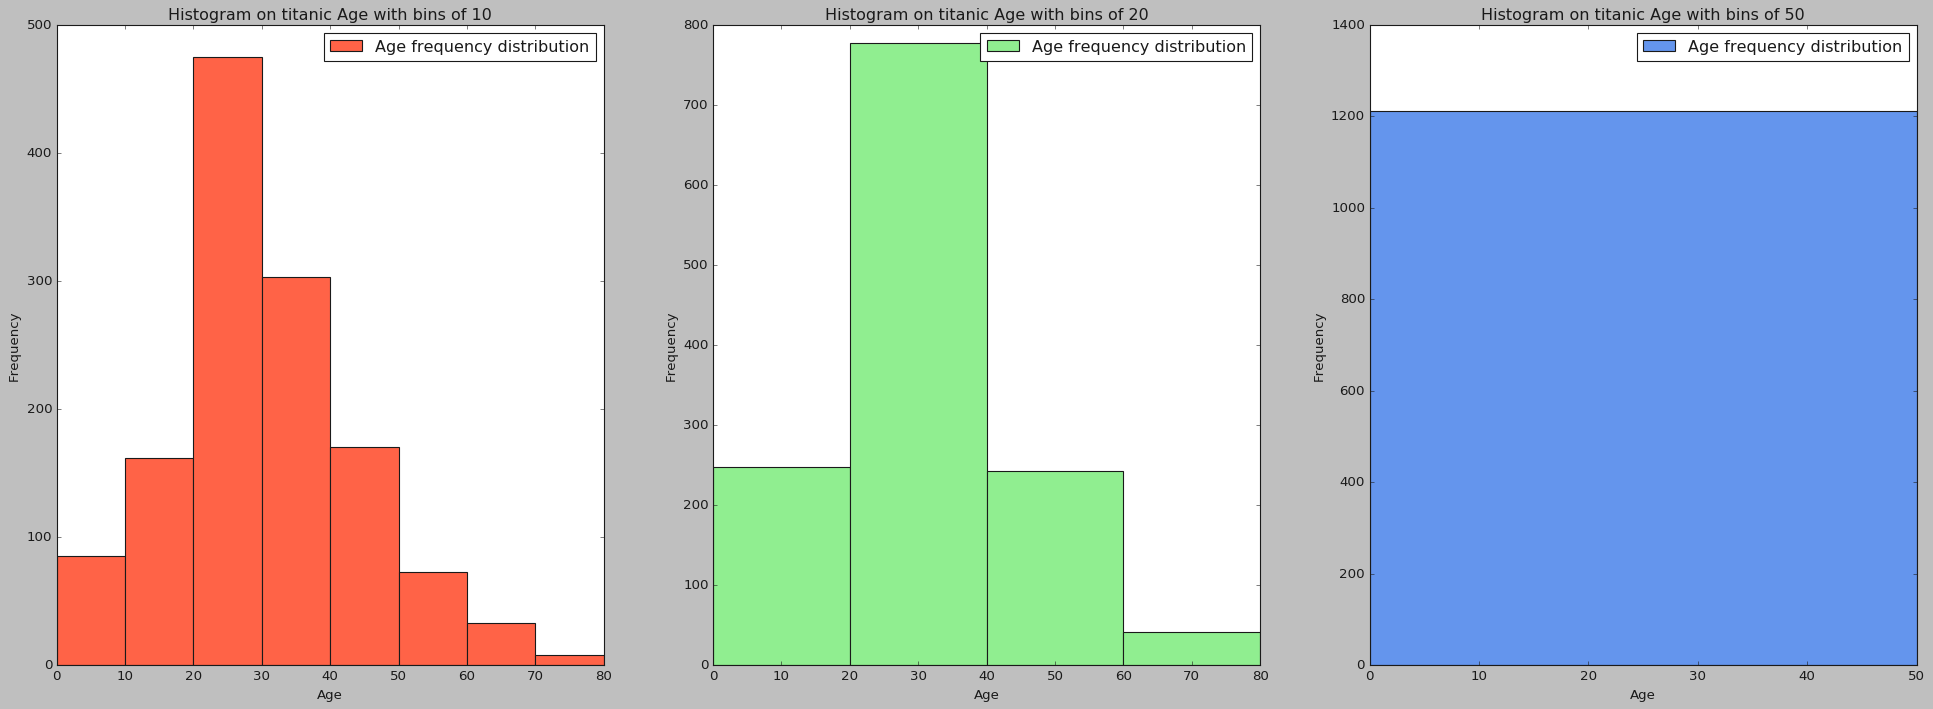

In [213]:
# your code here
fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(30,10)) 


bins_ax1 = [i for i in range(0,90,10)]
bins_ax2 = [i for i in range(0,90,20)]
bins_ax3 = [i for i in range(0,100,50)]

ax1.hist(titanic['Age'], label='Age frequency distribution', bins=bins_ax1, color='tomato')
ax2.hist(titanic['Age'], label='Age frequency distribution', bins=bins_ax2, color='lightgreen')
ax3.hist(titanic['Age'], label='Age frequency distribution', bins=bins_ax3, color='cornflowerblue')


ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram on titanic Age with bins of 10')
ax1.legend()


ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram on titanic Age with bins of 20')
ax2.legend()

ax3.set_xlabel('Age')
ax3.set_ylabel('Frequency')
ax3.set_title('Histogram on titanic Age with bins of 50')
ax3.legend()

plt.show()

#### How does the bin size affect your plot?

It completely affects the way we can understand data. Taking a look at the histogram's subplots, they can be completely bias depending on the bins we are using. 
For example, when we have bins of 10 we can see that the ages distribution follows a normal distribution. However, when we have bins of 20 the normal distribution starts to dissapear and when we only have two bins of 50, it seems that we have a uniform distribution. 

#### Use seaborn to show the distribution of column `Age`.

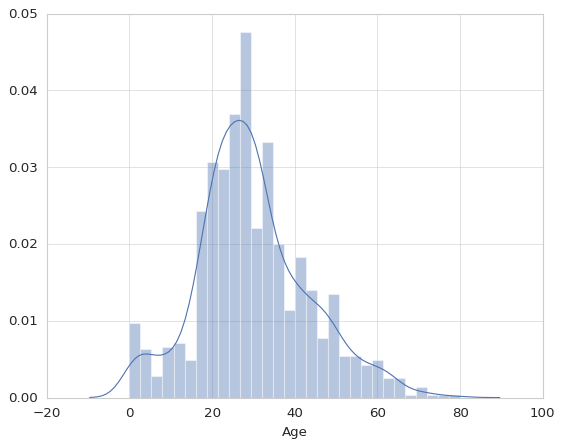

In [278]:
# your code here

sns.distplot(titanic['Age'], axlabel="Age")

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [225]:

gender_group= titanic.groupby(by='Gender').count()[['PassengerId']]
gender_group

,PassengerId
Gender,
female,466
male,843


Text(0, 0.5, 'Frequency')

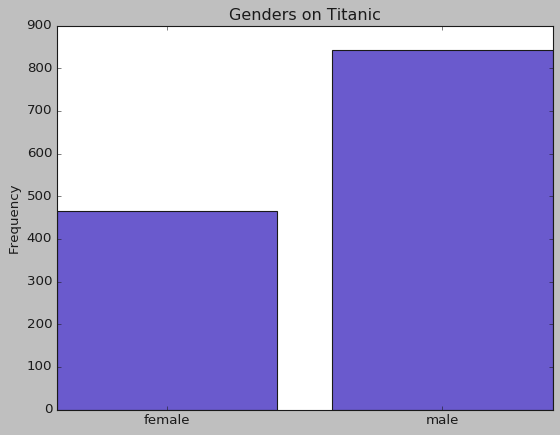

In [231]:
# Method 1 - matplotlib

plt.bar(gender_group.index, gender_group['PassengerId'], color='slateblue')
plt.title('Genders on Titanic')
plt.ylabel('Frequency')


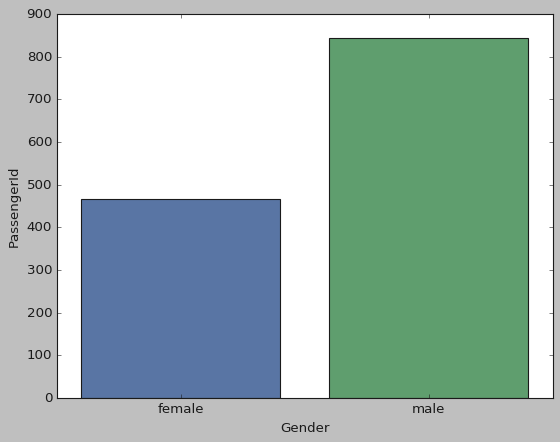

In [232]:
# Method 2 - seaborn
sns.barplot(gender_group.index, gender_group['PassengerId'])

#### Use the right plot to visualize the column `Pclass`.

Text(0, 0.5, 'Frequency')

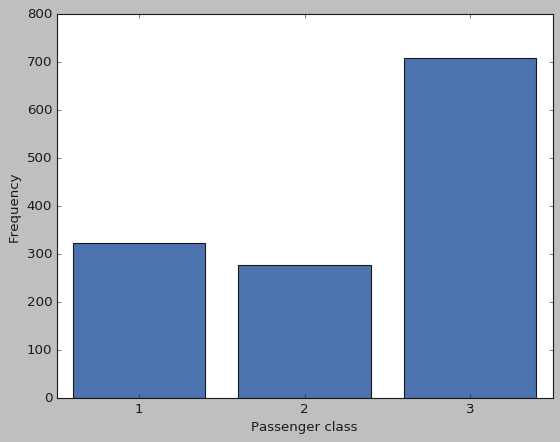

In [236]:
pass_class = gender_group= titanic.groupby(by='Pclass').count()[['PassengerId']]


plt.bar(pass_class.index, pass_class['PassengerId'])

bins=(1,2,3)
plt.xticks(pass_class.index, bins)

plt.xlabel('Passenger class')
plt.ylabel('Frequency')

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

(0, 90)

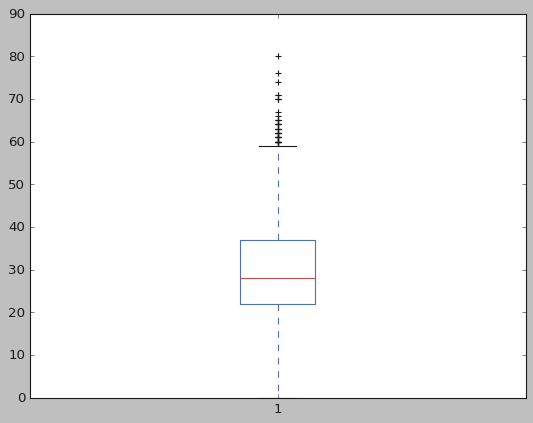

In [258]:
summ_stats = titanic[['Age']].describe().drop('count')

plt.boxplot(titanic['Age'])

plt.ylim(0,90)


We have chosen boxplot since it is a kind of graph that easily summarizes all
the information that we have on describe pandas method. 

#### What does the last plot tell you about the feature `Age`?

It tells us that the mean value is quite low compared to the maximum age, that is 80. The mean age is 30. That 
means that a lot of people were under 30 or 30. We can also see this by ,looking at the quartiles, that states 
that the 75% of the data is under 30. 
Also, we can see that there are some outliers. 


#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

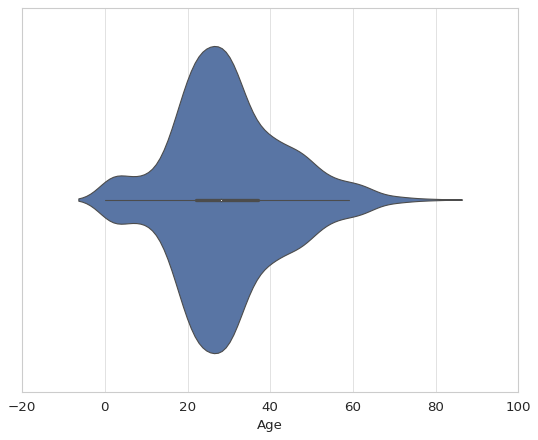

In [279]:
sns.violinplot(titanic['Age'])

#### What additional information does the last plot provide about feature `Age`?

This plot also tells us which is the probability distribution of the Age. Furthermore, we can see that the mean is quite low and it is about 30 years old. 

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

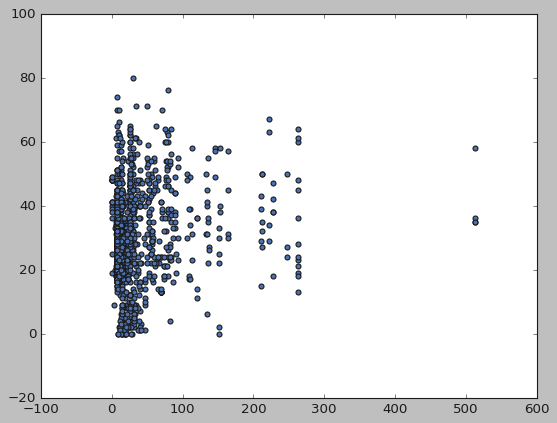

In [255]:
# Method 1 - matplotlib
plt.scatter(titanic['Fare'], titanic['Age'])

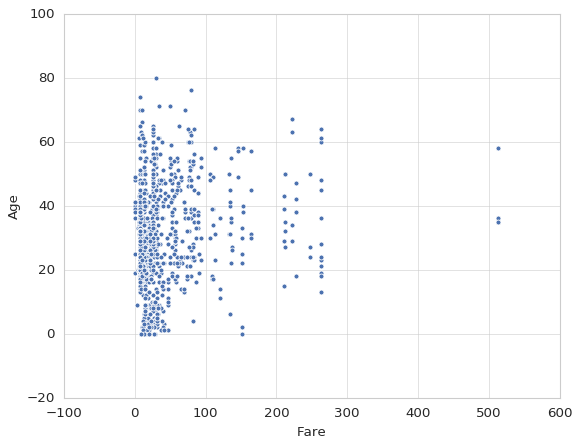

In [280]:
# Method 2 - seaborn
sns.scatterplot(titanic['Fare'], titanic['Age'])

#### Plot the correlation matrix using seaborn.

In [267]:
corr = titanic.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1,-0.00500666,-0.0383544,0.0252476,-0.055224,0.00894208,0.0311277
Survived,-0.00500666,1,-0.338481,-0.0640796,-0.0353225,0.0816294,0.257307
Pclass,-0.0383544,-0.338481,1,-0.429681,0.060832,0.0183222,-0.558683
Age,0.0252476,-0.0640796,-0.429681,1,-0.260134,-0.143979,0.173464
SibSp,-0.055224,-0.0353225,0.060832,-0.260134,1,0.373587,0.160349
Parch,0.00894208,0.0816294,0.0183222,-0.143979,0.373587,1,0.221635
Fare,0.0311277,0.257307,-0.558683,0.173464,0.160349,0.221635,1


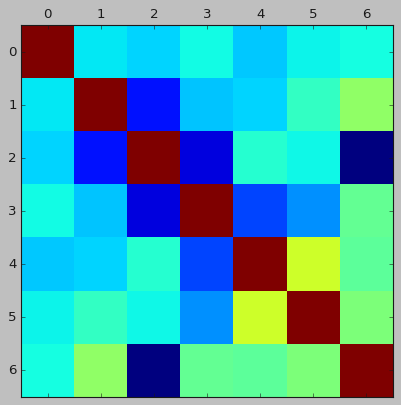

In [264]:
plt.matshow(titanic.corr())
plt.show()

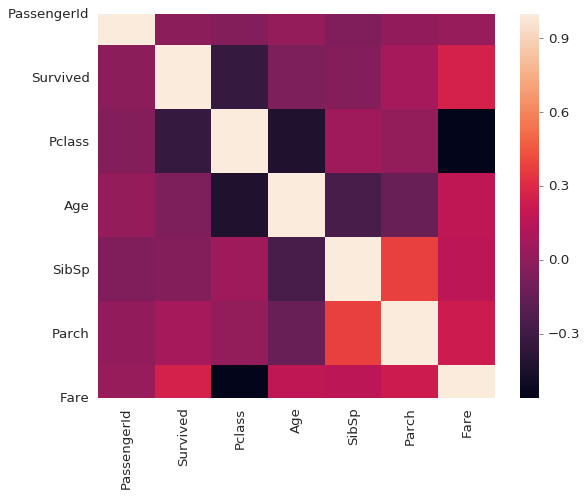

In [282]:
sns.heatmap(titanic.corr())
plt.show()

#### What are the most correlated features?

- Passenger class and Fare 
- Survived and Passenger Class. 
- Age and passenger class


#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

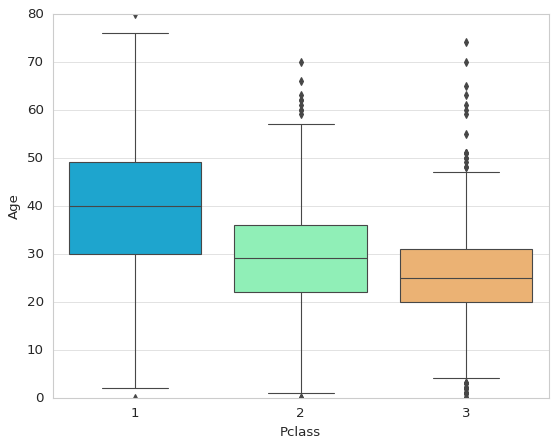

In [283]:
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='rainbow')
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

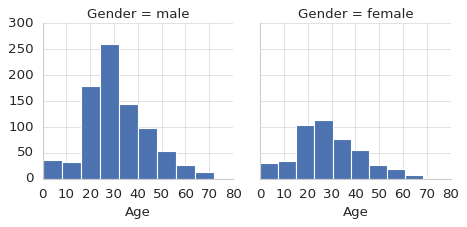

In [284]:
#Create a grid with FacetGrid
g = sns.FacetGrid(data=titanic, col="Gender")

#Draw a plot on each facet
g.map(plt.hist, "Age")

#We show the plot
plt.show()